# Importing Libraries 

In [39]:
# Importing all neccesary libraries
# %pip install pandas scikit-learn

import pandas as pd # Pandas
import numpy as np # Numpy
from scipy import stats # Scipy - for statistics
import matplotlib.pyplot as plt # Matplotlib - for ploting
import seaborn as sns # Seaborn - for ploting
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor

import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc


In [40]:
kaggle_train_df = pd.read_csv('train.csv')
kaggle_test_df = pd.read_csv('test.csv')

kaggle_test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [41]:
kaggle_train_df = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

kaggle_train_df = kaggle_train_df[['Age', 'Sex', 'Pclass', 'Survived']]
kaggle_train_df['Sex'] = kaggle_train_df['Sex'].map({'male': 0, 'female': 1})

test_data = test_data[['Age', 'Sex', 'Pclass']]
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

#kaggle_train_df = pd.get_dummies(kaggle_train_df, columns=['Pclass'], drop_first=True)
kaggle_train_df['Age'] = kaggle_train_df['Age'].fillna(kaggle_train_df['Age'].mean())

X = kaggle_train_df.drop(columns=['Survived'])
y = kaggle_train_df['Survived']
X_test = test_data[['Age', 'Sex', 'Pclass']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# aggle_train_df.head()

# Random Forest 

In [ ]:
# Random Forest Classifier 

leaves = range(1, 1000, 50)
leave_accuracies = []

for leaf in leaves:
    rf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=leaf, random_state=24)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f'Leaf Nodes: {leaf}, Accuracy: {accuracy_score(y_test, y_pred)}')
    leave_accuracies.append(accuracy_score(y_test, y_pred))

best_leave = leaves[np.argmax(leave_accuracies)]

# Best tree with max_leaf_nodes
num_trees = range(1, 1000, 50)
tree_accuracies = []

for tree in num_trees:
    rf = RandomForestClassifier(n_estimators=tree, max_leaf_nodes=best_leave, random_state=24)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f'Number of Trees: {tree}, Accuracy: {accuracy_score(y_test, y_pred)}')
    tree_accuracies.append(accuracy_score(y_test, y_pred))

best_tree = num_trees[np.argmax(tree_accuracies)]

# Best Random Forest Classifier
rf = RandomForestClassifier(n_estimators=best_tree, max_leaf_nodes=best_leave, random_state=24)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Output the results
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
output.to_csv('submission_rf.csv', index=False)

# Accuracy of random forest classifier
accuracy_score(y_test, y_pred)

# Decission Tree

In [ ]:
# Decision Tree 
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Choosing the best depth
max_depth = range(1, 21)
dt_accuracy= []

for depth in max_depth:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    dt_accuracy.append(accuracy_score(y_test, y_pred))

dt_best_depth = max_depth[np.argmax(dt_accuracy)]
dt_best = DecisionTreeClassifier(max_depth=dt_best_depth)
dt_best.fit(X_train, y_train)
print("Score for decision tree:", dt_best.score(X_test, y_test))

d_test = pd.read_csv('test.csv')
pID = d_test['PassengerId']
y_pred = dt_best.predict(test_data)
output = pd.DataFrame({'PassengerId': pID, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)


Score for decision tree: 0.8379888268156425


# Decission Tree

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


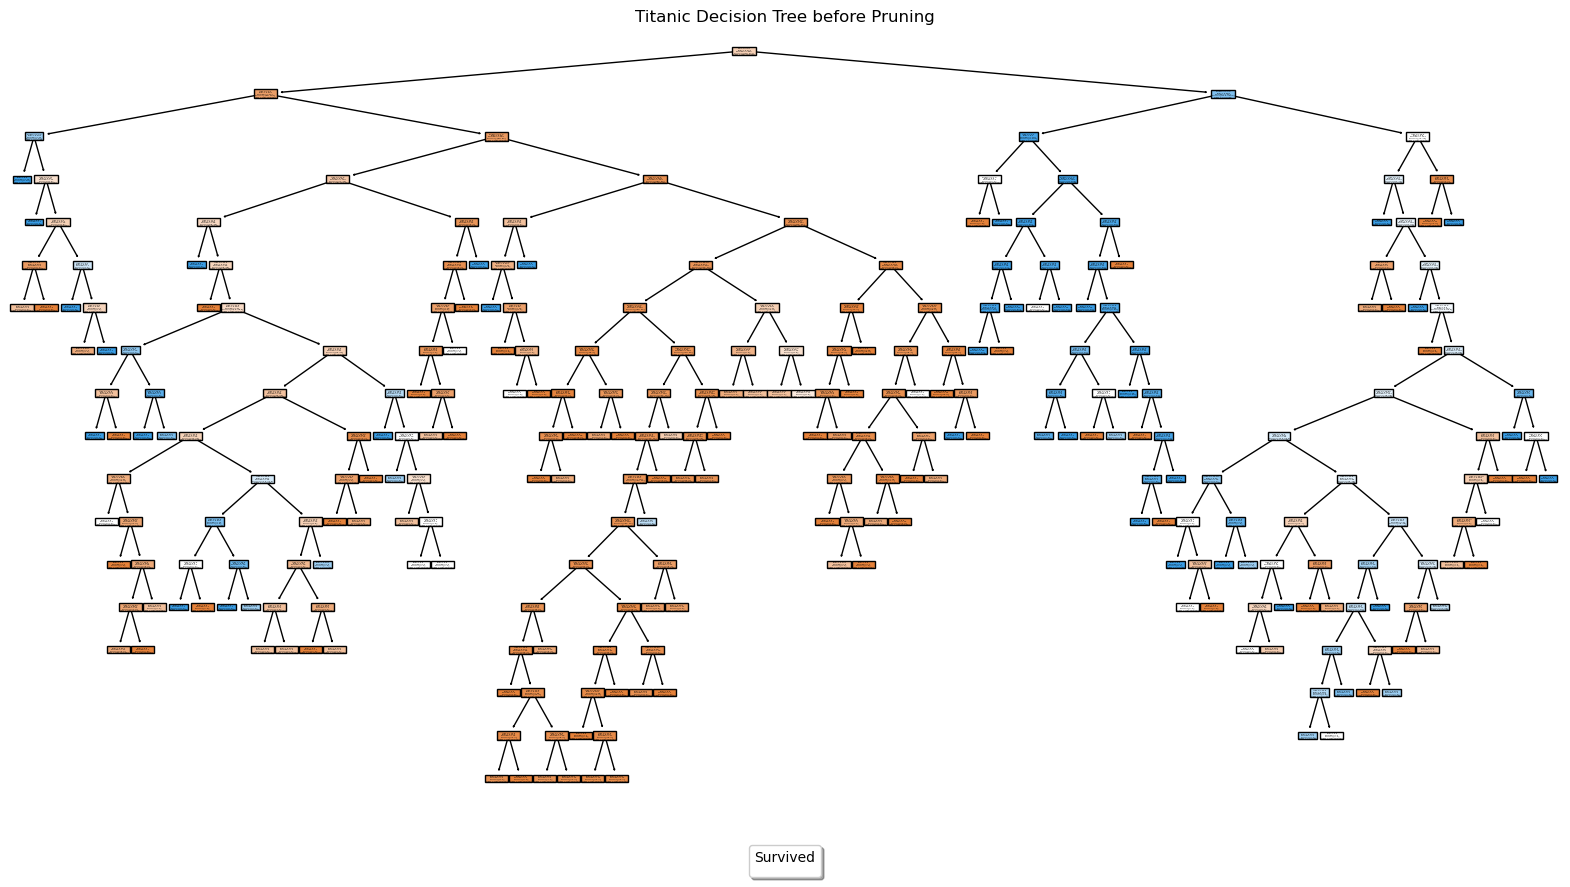

Accuracy for each fold: [0.75977654 0.79775281 0.81460674 0.81460674 0.82022472]
Mean Accuracy: 0.8013935095097608
Misclassification Error for each fold: [0.24022346 0.20224719 0.18539326 0.18539326 0.17977528]
Mean Misclassification Error: 0.19860649049023918
Test Accuracy: 0.9273743016759777
Test Misclassification Error: 0.07262569832402233
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       117
           1       0.93      0.85      0.89        62

    accuracy                           0.93       179
   macro avg       0.93      0.91      0.92       179
weighted avg       0.93      0.93      0.93       179



In [43]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X, y)

# Display the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title('Titanic Decision Tree before Pruning')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, title='Survived')
plt.show()

# 5-fold cross-validation to calculate accuracy
cv_scores = cross_val_score(dt_clf, X, y, cv=5, scoring='accuracy')
print(f'Accuracy for each fold: {cv_scores}') # Output accuracy for each fold
print(f'Mean Accuracy: {np.mean(cv_scores)}')
misclassification_error = 1 - cv_scores
print(f'Misclassification Error for each fold: {misclassification_error}') # Output misclassification error for each fold
print(f'Mean Misclassification Error: {np.mean(misclassification_error)}')

# Accuracy on the test set
test_accuracy = dt_clf.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Misclassification Error: {1 - test_accuracy}')

# Prediction on test data
y_pred = dt_clf.predict(X_test)

# Evaluate the model
#print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

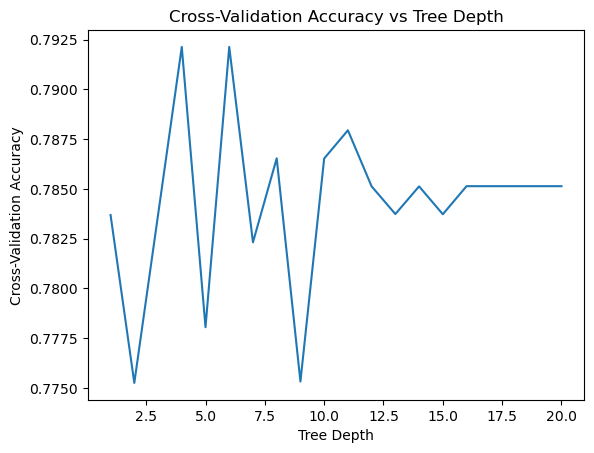

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best Tree Depth: 4, Cross-Validation Accuracy: 0.7921304048064611


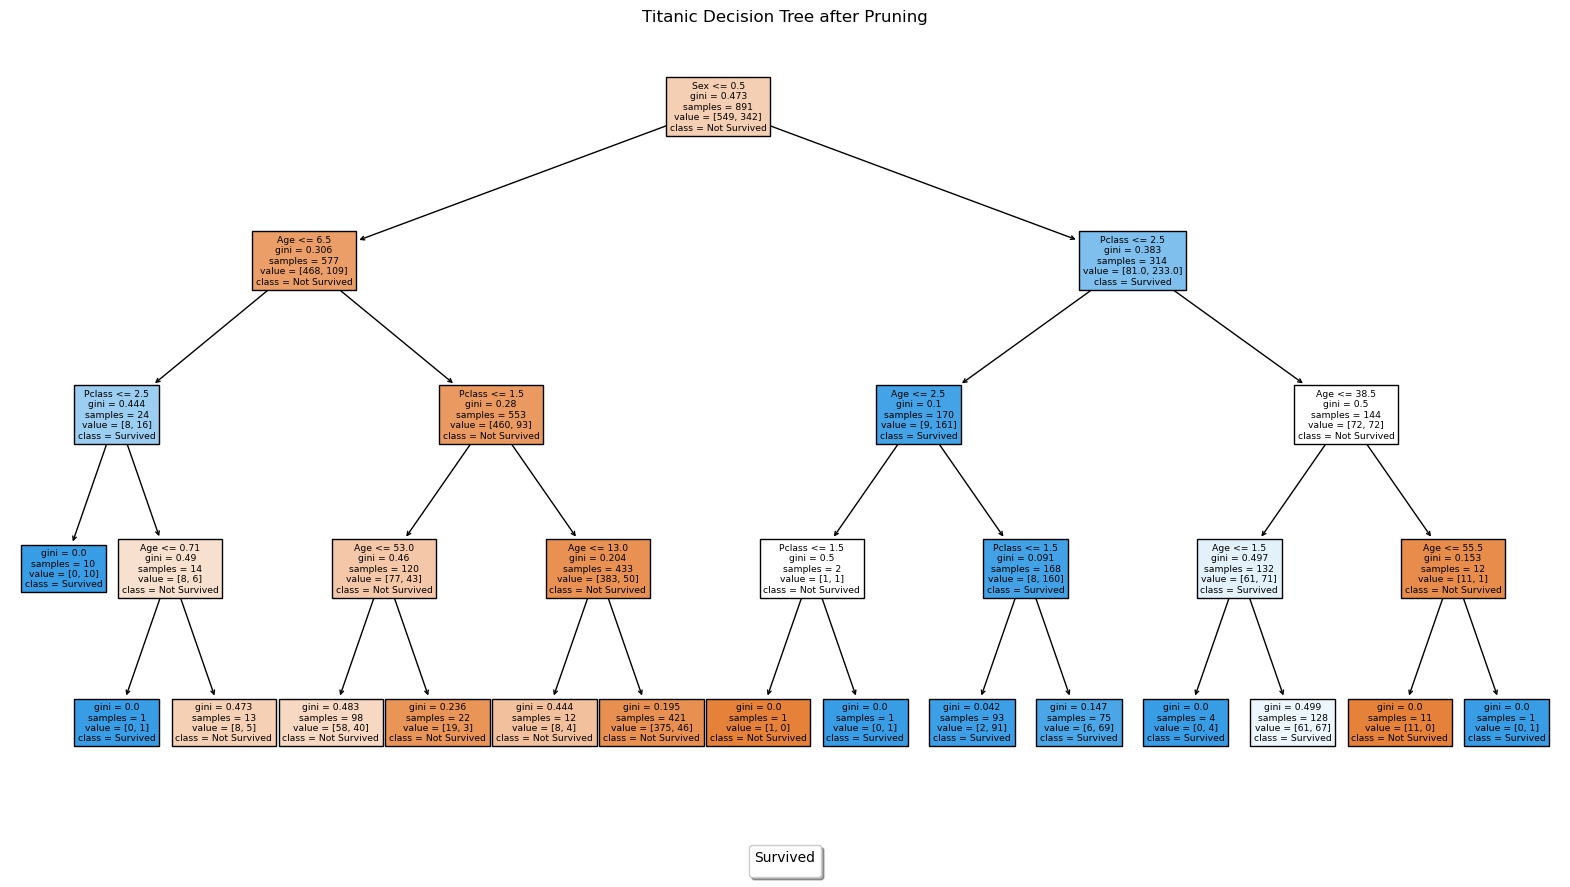

Misclassification Error for each fold: [0.27374302 0.1741573  0.20786517 0.23595506 0.17977528]
Mean Misclassification Error: 0.2142991651497081
Accuracy for each fold: [0.72625698 0.8258427  0.79213483 0.76404494 0.82022472]
Mean Accuracy: 0.7857008348502919
Test Accuracy: 0.9273743016759777
Test Misclassification Error: 0.07262569832402233
Cross validation scores:  [0.7578125  0.78125    0.81889764 0.76377953 0.77952756 0.77165354
 0.82677165]
Mean: 0.7856703458942632, Standard Deviation: 0.02479165172142204
0.8268156424581006
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       117
           1       0.76      0.73      0.74        62

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179

Missclassification error: 0.17318435754189943
Cross validaiton score: [0.74509804 0.84313725 0.78431373 0.75490196 0.8627451  0.72277228
 

In [44]:
# Performing k-fold cross-validation to evaluate performance for different tree depths
depth_range = range(1, 21)  # Trying depths from 1 to 20
cv_scores = []  # Storing the average cross-validation scores for each depth

for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))  # Average score for this depth

plt.plot(depth_range, cv_scores)
plt.xlabel("Tree Depth")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Cross-Validation Accuracy vs Tree Depth")
plt.show()

# Find the best tree depth and its score
best_score = np.max(cv_scores)
best_depth = depth_range[np.argmax(cv_scores)]
print(f"Best Tree Depth: {best_depth}, Cross-Validation Accuracy: {best_score}")

# Fit the best decision tree
dt = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
#dt.fit(X_train, y_train)
dt.fit(X, y)

# Display new decision tree after cross-validation
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title('Titanic Decision Tree after Pruning')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, title='Survived')
plt.show()


# 5-fold cross-validation to calculate accuracy
cv_scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
misclassification_error = 1 - cv_scores
print(f'Misclassification Error for each fold: {misclassification_error}') # Output misclassification error for each fold
print(f'Mean Misclassification Error: {np.mean(misclassification_error)}')
print(f'Accuracy for each fold: {cv_scores}') # Output accuracy for each fold
print(f'Mean Accuracy: {np.mean(cv_scores)}')

# Accuracy on the test set
test_accuracy = dt_clf.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Misclassification Error: {1 - test_accuracy}')

# Cross validation score
scores = cross_val_score(dt, X, y, cv=7)
print("Cross validation scores: ", scores)
dt_meand, dt_std = scores.mean(), scores.std()
print(f"Mean: {dt_meand}, Standard Deviation: {dt_std}")


# Predict on test data
y_pred = dt.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Missclassification error
missclassification_error = 1 - accuracy_score(y_test, y_pred)
print(f'Missclassification error: {missclassification_error}')  


cross_val_score(dt_clf, X_train, y_train, cv=7)

# Logistic Regression using cross-validation 
#log_reg = LogisticRegression()
#scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
scores = cross_val_score(dt_clf, X_train, y_train, cv=7)

print("Cross validaiton score:",scores)

# Accuracy
accuracy = np.mean(scores)
print("Accuracy:", accuracy)


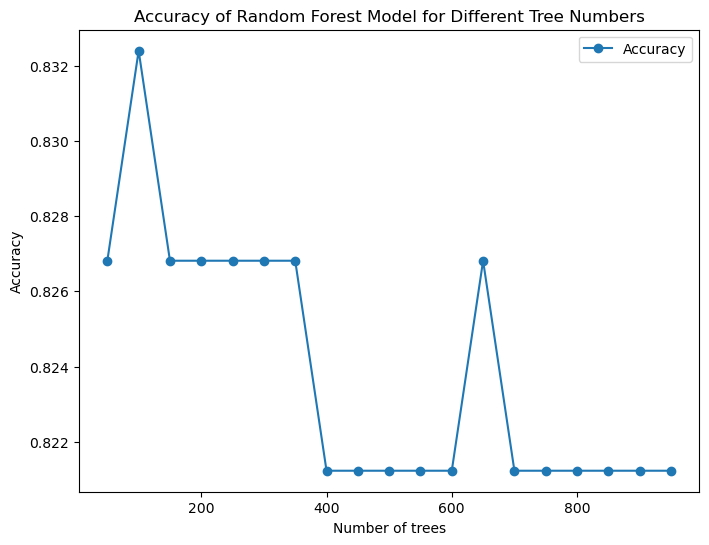

Best number of trees: 100
Best accuracy: 0.83


ValueError: All arrays must be of the same length

In [45]:
# Number of trees 
n_trees = list(range(50, 1000, 50))
tree_accuracies = []

# Building a random forest model for each number of trees
for n_tree in n_trees:
    # Random forest model
    rf = RandomForestClassifier(n_estimators=n_tree, random_state=1)
    
    # Fitting the model
    rf.fit(X_train, y_train)
    
    # Predicting the clusters
    y_pred = rf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    tree_accuracies.append(accuracy)

# Plotting the accuracy of the random forest model for each number of trees
plt.figure(figsize=(8, 6))
plt.plot(n_trees, tree_accuracies, marker='o', label='Accuracy')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest Model for Different Tree Numbers')
plt.legend()
plt.show()

# Selecting the best number of trees
optimal_n_tree = n_trees[np.argmax(tree_accuracies)]
print(f"Best number of trees: {optimal_n_tree}")
print(f"Best accuracy: {max(tree_accuracies):.2f}")

# Random forest model with the best number of trees
optimal_rf = RandomForestClassifier(n_estimators=optimal_n_tree)
optimal_rf.fit(X_train, y_train)
# Linear regression model
linear_reg = LogisticRegression(max_iter=1000, random_state=16)
linear_reg.fit(X_train, y_train) 
# Classification tree 
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)   
# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting the clusters
y_pred = optimal_rf.predict(X_test)
y_pred_linear = linear_reg.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Create dataframe with passenger id and y_pred
submission = pd.DataFrame({
    'PassengerId': kaggle_test_df['PassengerId'].values,
      'Survived': y_pred
    })
submission.to_csv('submission.csv', index=False)


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")
accuracy_linear = accuracy_score(y_test, y_pred_linear.round()) 
print(f"Linear Regression Accuracy: {accuracy_linear:.2f}")
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")


# Probability estimates of the positive class
y_pred_prob = optimal_rf.predict_proba(X_test)[:, 1]  
y_pred_prob_linear = linear_reg.predict(X_test) 
y_pred_prob_tree = decision_tree.predict_proba(X_test)[:, 1]
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]


# ROC curve - Random Forest
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# ROC curve - Linear Regression
fpr_linear, tpr_linear, thresholds_linear = roc_curve(y_test, y_pred_prob_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)
# ROC curve - Decision Tree
fp_tree, tp_tree, thresholds_tree = roc_curve(y_test, y_pred_prob_tree)
roc_auc_tree = auc(fp_tree, tp_tree)
# ROC curve - KNN
fp_knn, tp_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fp_knn, tp_knn)


# Plotting the ROC curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC Random Forest= {roc_auc:.3f}')
plt.plot(fpr_linear, tpr_linear, label=f'AUC Logistic= {roc_auc_linear:.3f}')
plt.plot(fp_tree, tp_tree, label=f'AUC Decision Tree= {roc_auc_tree:.3f}')
plt.plot(fp_knn, tp_knn, label=f'AUC KNN= {roc_auc_knn:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# Load prediction into new csv file for random forest
kaggle_test_df = pd.read_csv('test.csv')
kaggle_test_df = kaggle_test_df[['